In [ ]:
'''

  Tìm hiểu và trình bày về các ).
  Cho các ví dụ về các mô hình có sử dụng tokenbiểu diễn token theo phương pháp BPE
  (Byte-Pair Encodingizer theo BPE.
  So sánh 2 mô hình trên một bài toán cụ thể nào đó có sử dụng BPE và không sử dụng BPE.
  Lưu ý 2 mô hình này phải được train và test trên cùng một bộ dữ liệu.

'''

'\n\n  Tìm hiểu và trình bày về các ).\n  Cho các ví dụ về các mô hình có sử dụng tokenbiểu diễn token theo phương pháp BPE\n  (Byte-Pair Encodingizer theo BPE.\n  So sánh 2 mô hình trên một bài toán cụ thể nào đó có sử dụng BPE và không sử dụng BPE.\n  Lưu ý 2 mô hình này phải được train và test trên cùng một bộ dữ liệu.\n\n'

In [ ]:
# Dataset - SMS Spam Collection Dataset

# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from transformers import GPT2Tokenizer
from transformers import BertTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from datetime import datetime

In [ ]:
url = "/content/drive/MyDrive/datasets_task1.csv"
df = pd.read_csv(url, encoding='latin1')

print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

print(df.shape)
print(df.head())

(5572, 2)
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Preprocessing Data

In [ ]:
df.dtypes

v1    object
v2    object
dtype: object

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
# Tiền xử lý dữ liệu
def preprocess_text(text):
    # Xử lý tiền tố và hậu tố không cần thiết ở đây
    # Chuyển đổi văn bản về lowercase
    text = text.lower()
    return text

In [ ]:
df['processed_text'] = df['v2'].apply(preprocess_text)

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['v1'], test_size=0.2, random_state=42)

# Word Piece

In [ ]:
# BERT Tokenization using Word-Piece
def bert_tokenize(text):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    return tokenizer.tokenize(text)

X_train_bert = X_train.apply(bert_tokenize)
X_test_bert = X_test.apply(bert_tokenize)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes model without BPE
start_time_no_bpe = datetime.now()
naive_bayes_model_no_bpe = MultinomialNB()
naive_bayes_model_no_bpe.fit(X_train_tfidf, y_train)
end_time_no_bpe = datetime.now()

# Predict and evaluate the model without BPE
start_time_prediction_no_bpe = datetime.now()
y_pred_no_bpe = naive_bayes_model_no_bpe.predict(X_test_tfidf)
end_time_prediction_no_bpe = datetime.now()
accuracy_no_bpe = accuracy_score(y_test, y_pred_no_bpe)
print("Accuracy without BPE:", accuracy_no_bpe)
print("Training time without BPE:", end_time_no_bpe - start_time_no_bpe)
print("Prediction time without BPE:", end_time_prediction_no_bpe - start_time_prediction_no_bpe)

Accuracy without BPE: 0.9623318385650225
Training time without BPE: 0:00:00.012208
Prediction time without BPE: 0:00:00.000527


In [ ]:
from sklearn.metrics import classification_report

# Print classification report without BPE
print("Classification Report without BPE:")
print(classification_report(y_test, y_pred_no_bpe))

Classification Report without BPE:
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



# BPE

In [ ]:
# GPT-2 Tokenization using BPE
def gpt2_tokenize(text):
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    return tokenizer.tokenize(text)

X_train_gpt2 = X_train.apply(gpt2_tokenize)
X_test_gpt2 = X_test.apply(gpt2_tokenize)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
# Train Naive Bayes model with BPE
# Note: Use X_train_gpt2 and X_test_gpt2 from GPT-2 Tokenizer
# Convert tokenized text back to string for vectorization
X_train_gpt2_str = X_train_gpt2.apply(lambda tokens: ' '.join(tokens))
X_test_gpt2_str = X_test_gpt2.apply(lambda tokens: ' '.join(tokens))

# Vectorize the tokenized text data using TF-IDF
tfidf_vectorizer_bpe = TfidfVectorizer()
X_train_tfidf_bpe = tfidf_vectorizer_bpe.fit_transform(X_train_gpt2_str)
X_test_tfidf_bpe = tfidf_vectorizer_bpe.transform(X_test_gpt2_str)

# Train Naive Bayes model with BPE
start_time_bpe = datetime.now()
naive_bayes_model_bpe = MultinomialNB()
naive_bayes_model_bpe.fit(X_train_tfidf_bpe, y_train)
end_time_bpe = datetime.now()

# Predict and evaluate the model with BPE
start_time_prediction_bpe = datetime.now()
y_pred_bpe = naive_bayes_model_bpe.predict(X_test_tfidf_bpe)
end_time_prediction_bpe = datetime.now()
accuracy_bpe = accuracy_score(y_test, y_pred_bpe)
print("Accuracy with BPE:", accuracy_bpe)
print("Training time with BPE:", end_time_bpe - start_time_bpe)
print("Prediction time with BPE:", end_time_prediction_bpe - start_time_prediction_bpe)

Accuracy with BPE: 0.97847533632287
Training time with BPE: 0:00:00.021664
Prediction time with BPE: 0:00:00.000787


In [ ]:
# Print classification report with BPE
print("Classification Report with BPE:")
print(classification_report(y_test, y_pred_bpe))

Classification Report with BPE:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



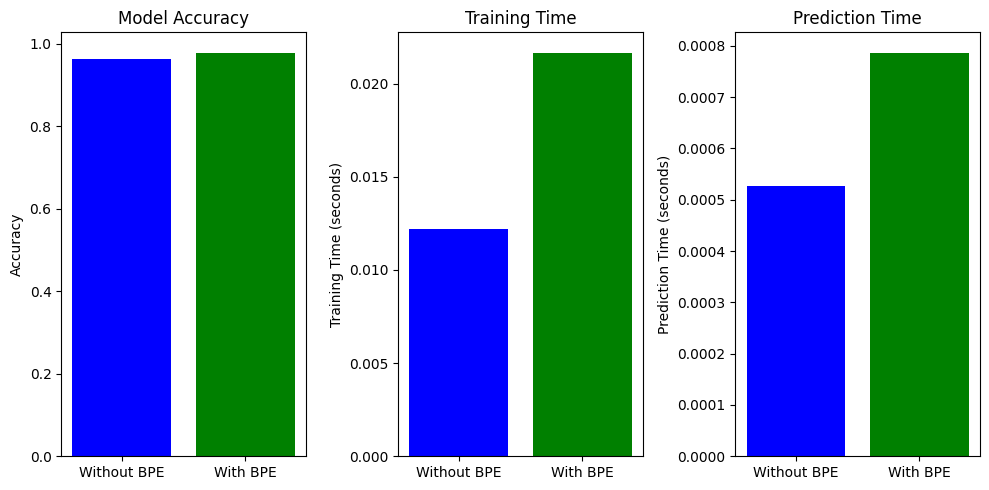

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
accuracies = [accuracy_no_bpe, accuracy_bpe]
training_times = [(end_time_no_bpe - start_time_no_bpe).total_seconds(),
                  (end_time_bpe - start_time_bpe).total_seconds()]
prediction_times = [(end_time_prediction_no_bpe - start_time_prediction_no_bpe).total_seconds(),
                    (end_time_prediction_bpe - start_time_prediction_bpe).total_seconds()]

labels = ['Without BPE', 'With BPE']

# Plot accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

# Plot training time
plt.subplot(1, 3, 2)
plt.bar(labels, training_times, color=['blue', 'green'])
plt.ylabel('Training Time (seconds)')
plt.title('Training Time')

# Plot prediction time
plt.subplot(1, 3, 3)
plt.bar(labels, prediction_times, color=['blue', 'green'])
plt.ylabel('Prediction Time (seconds)')
plt.title('Prediction Time')

plt.tight_layout()
plt.show()